# Tabular Playground Series - Feb 2022

This dataset is aimed to practive ML skills by using the genomic analysis technique data with some data compression and data loss.

ATATGGCCTT will be represented as A2T4G2C2 instead of the sequence.

Let's start with checking the data set and let's find out some direction for analysis.

PS. This is my first notebook for a competition and I find it very fun. I hope you guys will enjoy watch it and please feel free to leave a comment for further discussion. What I have done was learnt by other experts on Kaggle or video. I think it will be great to have a practical notebook and try to ask for suggestion from others instead of keep watching the video. Thanks for watching & have fun!

## Next Step & Discussion:

UMAP may not be a good technique for this data set since there is no pattern & cluster can be found. It is great to preview the scatter plot first since it gave a lot of information that the UMAP is helpful or not.
GridSearchCV is great as well since it can help to tune the hyper-parameter. GridSearchCV can be used again for further tuning but it may need to cost a lot of time and computational power. Next, the other model for classification can be used since the accuracy for XGBoost is hard to improve or it is hard to adjust the perfect one. Let's try again in the future.

#### Result of the submission

17/02/2022 First trial (XGBoost): Score = 0.90366, Rank = 701

18/02/2022 Second trial (XGBoost) : Score = 0.91611, Rank = 720 (Accuracy was increased)

19/02/2022 Third trial (XGBoost with higher lambda & alpha): Score = 0.90005, Rank = NA

19/02/2022 Fourth trial (XGBoost with 100 lambda & alpha): Score = 0.82967, Rank = NA

19/02/2022 Fifth trial (XGBoost with no gamma + Second trial regularization): Score = 0.91781, Rank = 724

21/02/2022 Sixth trial (XGBoost with 10-fold & depth adjusted): Score = 0.94448, Rank = 679

22/02/2022 Seventh trial (XGBoost with 5-fold & PCA): Score = 0.86250, Rank = NA

22/02/2022 Eighth trial (XGBoost with 5-fold & features amount PCA): Score = 0.87796, Rank = NA 

26/02/2022 Ninth trial (XGBoost with GridSearchCV): Score = 0.93042, Rank = NA

26/02/2022 Tenth trial (XGBoost with UMAP): Score = 0.78098, Rank = NA

In [1]:
# libraries set up
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data
train_path = 'Data/train.csv'
test_path = 'Data/test.csv'

train_set = pd.read_csv(train_path, index_col = 0)
test_set = pd.read_csv(test_path, index_col = 0)

In [3]:
# preview for the train data
df_train = train_set.copy()
df_train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [4]:
#preview for the test data
df_test = test_set.copy()
df_test.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [5]:
# check the shape for train set
df_train.shape

(200000, 287)

In [6]:
# check the shape for test set
df_test.shape

(100000, 286)

There are 200000 set data for model training. 

100000 testing sample was used for prediction and check with the performance by upload the result to Kaggle.

Now, let's check the whole data set and see is there any duplicate/non-numeric data/ missing value and some column needed to be worked on for feature engineering.

#### Missing value

Let's check is there any missing value for each sample in both training and testing set

In [7]:
# count the missing value in both data set
train_missing_count = 0
for i in df_train.columns:
    train_missing_count += df_train[i].isna().sum()

test_missing_count = 0
for i in df_test.columns:
    test_missing_count += df_test[i].isna().sum()
    
print('Missing value for train set: {0}'.format(train_missing_count))
print('Missing value for test set: {0}'.format(test_missing_count))

Missing value for train set: 0
Missing value for test set: 0


There is no missing value for the data set and we don't have to fill with other value. All the information was remained & obtained.

Next, we have to work on the duplicate.

#### Duplicate

Let's check the sample number for duplicate sample

In [8]:
# print the sample size for duplicate in both train and test set
print(f'Duplicate sample in train set: {df_train.duplicated().sum()}')
print(f'Duplicate sample in test set: {df_test.duplicated().sum()}')

Duplicate sample in train set: 76007
Duplicate sample in test set: 26779


Let's remove the duplicates for training set since it may cause overfitting issues.

In [9]:
# remove the duplicate and replace training set
df_train.drop_duplicates(subset = None, keep = 'first', inplace = True)

#### Object type encoding/ mapping

All the features should be numeric data except the target column but we can still check about the whole data set.

In [10]:
# check for the object column in training set
object_list = []
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        object_list.append(i)
print(object_list)

['target']


We can see that only the target columns was object type and it is the only column that we needed to do some feature engineering. We can check for the test set as well.

In [11]:
# check for the object column in testing set
object_list = []
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        object_list.append(i)
print(object_list)

[]


Now, all the features parameter was numeric and it can be applied easily for our model without any transformation at this moment.

Let's work on the target column in training set and change it to numeric value that's the model is readable.

There is two ways for handling this column: (1) Ordinal Encoding (2) One-Hot Encoding. From the description of the data set, there is ten type of bacteria as our target and Orginal Encoding will be a better way to deal with it since it is our target column and we dont want much column for each type of bacteria.

In [12]:
# let's check about what type of bacteria
list(df_train['target'].unique())

# let's assign a number for each type
ordinal_target = dict(enumerate(df_train['target'].unique()))
ordinal_target = {y:x for x,y in ordinal_target.items()}
ordinal_target

{'Streptococcus_pyogenes': 0,
 'Salmonella_enterica': 1,
 'Enterococcus_hirae': 2,
 'Escherichia_coli': 3,
 'Campylobacter_jejuni': 4,
 'Streptococcus_pneumoniae': 5,
 'Staphylococcus_aureus': 6,
 'Escherichia_fergusonii': 7,
 'Bacteroides_fragilis': 8,
 'Klebsiella_pneumoniae': 9}

In [13]:
reverse_target = {y:x for x,y in ordinal_target.items()}
reverse_target

{0: 'Streptococcus_pyogenes',
 1: 'Salmonella_enterica',
 2: 'Enterococcus_hirae',
 3: 'Escherichia_coli',
 4: 'Campylobacter_jejuni',
 5: 'Streptococcus_pneumoniae',
 6: 'Staphylococcus_aureus',
 7: 'Escherichia_fergusonii',
 8: 'Bacteroides_fragilis',
 9: 'Klebsiella_pneumoniae'}

In [14]:
# make another copy to prevent data change
label_df_train = df_train.copy()

# let's map with the dict that we create in the data set
label_df_train['target'] = label_df_train['target'].map(ordinal_target)

# let's check the data set after mapping/ ordinal encoding
label_df_train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,1
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,1
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


After the mapping, the data was ready for training the model and we can try it in a different.

Let's work a simple XGBoost model and check with the result first.

### XGBoost

In the XGBoost library, it got XGBoost Regressor & XGBoost Classifier. In the prediction, classification was needed and XGB Classifier will be used as the model.

In [30]:
# set up for machine learning libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Spliting of the data in data set by slicing

In [54]:
# slice the dataset for features and target
X = label_df_train.iloc[:,:-1].values
y = label_df_train.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

##### Ninth trial with GrisSearchCV

By using the PCA, the performance for the model is not that well for last trial. GridSearchCV is a great technique to help searching the best hyperparameter instead of try it one by one. Let's try with few combination and search for the best accuracy. It will repeat 540 fits to ensure that best hyperparameter was found. The parameters will be focused on n_estimators, max_depth & learning_rate.

Due to the cost of time, K-fold will not be used since it may cost more time to find the hyperparameter.
After the bset parameter was found, the model will be trained again and predict the final test set for accuracy checking.

PS. the best model may not be used since the random_state was forgot to reproduce the result and the accuracy should be closed to the others

In [41]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# make a dictionary of hyperparameter to search
search_space = {
    "n_estimators" : [500, 1000],
    "max_depth" : [8 , 10],
    "learning_rate" : [0.01, 0.1, 1]
}
# build a xgb classifier model without the hyperparameter that we want to check
model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                        eval_metric = 'auc', tree_method = 'hist', use_label_encoder = False)
# build a GridSearchCV model to start for the searching of hyperparameter
GS = GridSearchCV(estimator = model, # target model
                  param_grid = search_space, # dictionary of the parameters
                  cv = 2, # 2 cv to minimize the time for training
                  verbose = 3 # message for the searching progress
)
GS.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END learning_rate=0.01, max_depth=8, n_estimators=500;, score=0.939 total time= 4.2min
[CV 2/2] END learning_rate=0.01, max_depth=8, n_estimators=500;, score=0.940 total time= 4.5min
[CV 1/2] END learning_rate=0.01, max_depth=8, n_estimators=1000;, score=0.951 total time= 7.8min
[CV 2/2] END learning_rate=0.01, max_depth=8, n_estimators=1000;, score=0.951 total time= 7.5min
[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=500;, score=0.942 total time= 5.8min
[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=500;, score=0.942 total time= 5.8min
[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=0.952 total time= 9.6min
[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=0.953 total time= 9.9min
[CV 1/2] END learning_rate=0.1, max_depth=8, n_estimators=500;, score=0.961 total time= 4.3min
[CV 2/2] END learning_rate=0.1, max_depth=8, n_estimators=500;, scor

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='auc',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                       

In [43]:
print(GS.best_estimator_) # best model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [44]:
print(GS.best_params_) # best hyperparameter

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000}


In [45]:
print(GS.best_score_) # best score for the model

0.9611972498336593


In [58]:
# slice the dataset for features and target
X = label_df_train.iloc[:,:-1]
y = label_df_train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

best_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                        eval_metric = 'auc', tree_method = 'hist', use_label_encoder = False,
                          learning_rate = 0.1, max_depth = 8, n_estimators = 1000)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9756845034073954


In [59]:
predictions = best_model.predict(df_test)

In [64]:
# take the result appeared most in 5-fold result and generate the submission to test the accuracy
from scipy.stats import mode
xgb_result = pd.DataFrame()
xgb_result['row_id'] = df_test.index
xgb_result['target'] = predictions
xgb_result['target'] = xgb_result['target'].map(reverse_target)
xgb_result.to_csv("xgb_GSCV_submission.csv", index = False)

After usign the best parameter from GridSearchCV, the accuracy of the submission was determined as 0.93042. It is not great than the sixth submission but we can enhance it by using the K-fold as well.

##### 10th submission: UMAP + previous model

Previously, PCA was used for dimension but it is not that great since the cluster was very close. Sample will have a chance to be predicted as a wrong target.

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
pca = PCA(n_components = None)
L = pca.fit_transform(X_scaled)

Let's recap for the scatter plotted by using the first two components

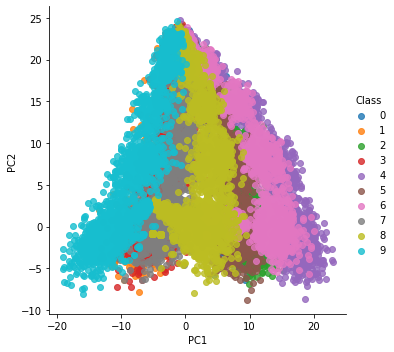

In [66]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:,0], foo[:,1], classifs), columns = ["PC1","PC2","Class"])
    sns.lmplot(data = bar, x = "PC1", y = "PC2", hue = "Class", fit_reg = False)
    
pca_scatter(pca, X_scaled, y)

Instead of PCA or t-SNE, UMAP was another great technique to reduce the dimension and form cluster. With this model, it may be helpful to classify our sample.

In [71]:
from umap import UMAP
import warnings
warnings.filterwarnings("ignore")

# create the UMAP model
reducer = UMAP(n_components = 2, n_neighbors = 10)

# fit and transform all the data with training data set
embedding = reducer.fit_transform(X_train)

Let's plot and check with the cluster according to the target class

Text(0.5, 1.0, 'Visualizing data with UMAP')

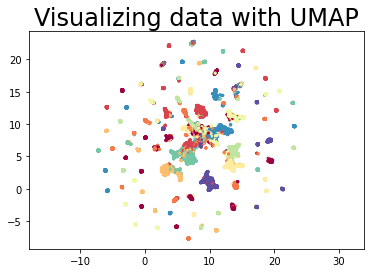

In [72]:
# plot a scatter plot and check with the class
plt.scatter(embedding[:,0], embedding[:,1], s = 5, c = y_train, cmap = 'Spectral')
# set the axis and limit equal
plt.gca().set_aspect('equal', 'datalim')
# set the title
plt.title('Visualizing data with UMAP', fontsize= 24)

It seems that there is no pattern with UMAP. It may not be a good way to get a high accuracy. Let's try and check with the accuracy with XGBoost.

In [74]:
from sklearn.pipeline import Pipeline

# create the model for dimension reduction & xgboost
_umap = UMAP(n_components = 2, n_neighbors = 10)
_xgboost = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                        eval_metric = 'auc', tree_method = 'hist', use_label_encoder = False,
                          learning_rate = 0.1, max_depth = 8, n_estimators = 1000)
# create the pipeline for the progress
XGB_UMAP_model = Pipeline([
    ('umap', _umap),
    ('xgb', _xgboost)
])
# fit the training set into the pipeline for training
XGB_UMAP_model.fit(X_train, y_train)
# predict the validation set
y_pred = XGB_UMAP_model.predict(X_test)
# calculate the accuracy for the model
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8851163353361022


According to the validation accuracy, it seems UMAP may not be helpful for dimension reduction. May be dimension reduction is not a good technique for this data set. Let's try to predict the final test set and check with the accuracy.

In [75]:
predictions = XGB_UMAP_model.predict(df_test)

In [76]:
# take the result appeared most in 5-fold result and generate the submission to test the accuracy
from scipy.stats import mode
xgb_result = pd.DataFrame()
xgb_result['row_id'] = df_test.index
xgb_result['target'] = predictions
xgb_result['target'] = xgb_result['target'].map(reverse_target)
xgb_result.to_csv("xgb_UMAP_submission.csv", index = False)

The accuracy (0.78098)for using UMAP was terrible and it is great to know about the preview of UMAP scatter plot do really helpful for the accuracy.